In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from scipy import stats
from scipy.stats import ttest_rel
from sklearn.utils import resample
from collections import Counter
from sklearn.base import BaseEstimator, ClassifierMixin

# Loading file and brief analysis

In [ ]:
lista_plikow = ["hepatitisC.arff"]

ramki_danych = []

for plik in lista_plikow:
    with open(plik, 'r') as f:
        lines = f.readlines()
        data = [list(map(float, line.strip().split(','))) for line in lines]

    df = pd.DataFrame(data)
    ramki_danych.append(df)

dane = pd.concat(ramki_danych, ignore_index=True)

In [ ]:
print(dane.head(50))

    0      1      2      3      4      5      6      7      8      9      ...  \
0   3.317  3.965  2.302  6.304  4.716  2.415  2.281  3.251  3.824  3.283  ...   
1   3.509  3.877  2.410  6.302  4.961  2.345  2.345  3.436  3.782  2.894  ...   
2   3.883  4.136  2.297  6.546  4.600  2.401  2.382  3.442  4.031  2.569  ...   
3   3.947  3.860  2.276  6.292  4.602  2.400  2.254  3.314  3.838  2.887  ...   
4   3.306  4.050  2.336  6.381  4.793  2.362  2.239  3.237  3.901  3.023  ...   
5   3.391  3.907  2.287  6.581  4.742  2.412  2.357  3.151  4.145  3.081  ...   
6   3.818  3.412  2.164  5.968  4.069  2.435  2.094  3.649  3.078  3.072  ...   
7   3.682  4.189  2.344  6.491  4.526  2.359  2.298  3.532  4.006  2.884  ...   
8   3.775  3.794  2.409  6.225  4.724  2.389  2.364  3.366  3.792  3.031  ...   
9   3.844  3.982  2.294  6.340  4.453  2.345  2.473  3.474  3.911  2.756  ...   
10  3.825  3.623  2.402  6.482  4.689  2.416  2.312  3.173  3.775  2.915  ...   
11  3.911  4.367  2.249  6.6

In [ ]:
dane.describe()

,0,1,2,3,4,5,6,7,8,9,...,22268,22269,22270,22271,22272,22273,22274,22275,22276,22277
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,...,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,3.562228,3.927764,2.313618,6.406065,4.665472,2.382976,2.344179,3.383593,3.860675,2.939276,...,2.482553,5.592390,2.958163,2.786228,2.884496,2.817236,2.756675,3.107211,2.227236,2.349593
std,0.259039,0.213425,0.083468,0.188855,0.227221,0.065253,0.094500,0.119305,0.227159,0.192681,...,0.364069,0.183221,0.153492,0.419787,0.097658,0.130566,0.144444,0.327040,0.059716,1.101294
min,3.004000,2.986000,2.123000,5.747000,4.069000,2.246000,2.094000,3.078000,3.078000,2.525000,...,2.083000,5.056000,2.698000,2.132000,2.542000,2.605000,2.476000,2.598000,2.098000,1.000000
25%,3.354500,3.811000,2.264500,6.303000,4.533000,2.341500,2.285500,3.300500,3.722000,2.805500,...,2.294500,5.488000,2.848500,2.498000,2.828500,2.728500,2.678500,2.867500,2.193000,1.000000
50%,3.552000,3.922000,2.302000,6.421000,4.678000,2.375000,2.345000,3.374000,3.830000,2.920000,...,2.379000,5.610000,2.935000,2.662000,2.884000,2.795000,2.732000,3.019000,2.221000,3.000000
75%,3.762000,4.069000,2.348500,6.525500,4.791500,2.415500,2.388500,3.463000,3.967000,3.074500,...,2.537000,5.720500,3.032500,2.987000,2.937000,2.876000,2.799000,3.289500,2.251500,3.000000
max,4.200000,4.381000,2.626000,6.819000,5.322000,2.561000,2.632000,3.690000,4.602000,3.603000,...,4.504000,5.908000,3.388000,4.102000,3.151000,3.243000,3.602000,4.235000,2.563000,4.000000


In [ ]:
dane.isnull().sum()

0        0
1        0
2        0
3        0
4        0
        ..
22273    0
22274    0
22275    0
22276    0
22277    0
Length: 22278, dtype: int64

# Dividing into trn and tst, introducing different classifiers

In [ ]:
X = dane.iloc[:, :-1]
y = dane.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train_selected, y_train)
svm_predictions = svm_classifier.predict(X_test_selected)

In [ ]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_selected, y_train)
rf_predictions = rf_classifier.predict(X_test_selected)

In [ ]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_selected, y_train)
knn_predictions = knn_classifier.predict(X_test_selected)

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_selected, y_train)
dt_predictions = dt_classifier.predict(X_test_selected)

In [ ]:
y_train_xgb = (y_train == 2.0).astype(int)
y_test_xgb = (y_test == 2.0).astype(int)
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_selected, y_train_xgb)
xgb_predictions = xgb_classifier.predict(X_test_selected)

In [ ]:
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train_selected, y_train)
ada_predictions = ada_classifier.predict(X_test_selected)

In [ ]:
mlp_classifier = MLPClassifier(max_iter=3000)
mlp_classifier.fit(X_train_selected, y_train)
mlp_predictions = mlp_classifier.predict(X_test_selected)

In [ ]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_selected, y_train)
lr_predictions = lr_classifier.predict(X_test_selected)

In [ ]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_selected, y_train)
y_pred_nb = naive_bayes_model.predict(X_test_selected)

In [ ]:
class CustomClassifier2(BaseEstimator, ClassifierMixin):
    def __init__(self):
        pass

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        y_pred = []
        for sample in X:
            class_weights = {c: [] for c in self.classes_}
            for class_label in self.classes_:
                distances = []
                for train_sample, train_label in zip(self.X_train, self.y_train):
                    if train_label == class_label:
                        distance = np.abs(sample - train_sample) / (np.max(self.X_train, axis=0) - np.min(self.X_train, axis=0))
                        distances.append(np.mean(distance))
                class_weights[class_label] = distances
            class_weights_sum = {c: sum(weights) / len(weights) for c, weights in class_weights.items()}
            predicted_class = min(class_weights_sum, key=class_weights_sum.get)
            y_pred.append(predicted_class)
        return np.array(y_pred)

    def score(self, X, y):
        y_pred = self.predict(X)
        return np.mean(y_pred == y)

# Classification results - confusion matrix and accuracy metrics

In [ ]:
selector = SelectKBest(score_func=f_classif, k=50)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

custom_classifier2 = CustomClassifier2()
custom_classifier2.fit(X_train_selected, y_train)
y_pred_custom = custom_classifier2.predict(X_test_selected)

conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)
print(f"\nConfusion Matrix for Custom Classifier2:\n{conf_matrix_custom}")

precision_custom = precision_score(y_test, y_pred_custom, average='weighted', zero_division=0)
print(f"Precision for Custom Classifier2: {precision_custom:.2f}")

recall_custom = recall_score(y_test, y_pred_custom, average='weighted')
print(f"Recall for Custom Classifie2r: {recall_custom:.2f}")

f1_custom = f1_score(y_test, y_pred_custom, average='weighted')
print(f"F1 Score for Custom Classifier2: {f1_custom:.2f}")

accuracy_custom = accuracy_score(y_test, y_pred_custom)
print(f"Accuracy for Custom Classifier2: {accuracy_custom:.2f}\n")


Confusion Matrix for Custom Classifier2:
[[7 1 0 0]
 [0 5 0 0]
 [0 2 4 0]
 [0 0 0 6]]
Precision for Custom Classifier2: 0.93
Recall for Custom Classifie2r: 0.88
F1 Score for Custom Classifier2: 0.88
Accuracy for Custom Classifier2: 0.88



In [ ]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)

y_train_xgb = y_train_int - 1
y_test_xgb = y_test_int - 1

classifiers = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'XGB': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'MLP': MLPClassifier(max_iter=3000),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train_xgb)
    y_pred = clf.predict(X_test)

    conf_matrix = confusion_matrix(y_test_xgb, y_pred)
    print(f"\nConfusion Matrix for {clf_name}:\n{conf_matrix}")

    precision = precision_score(y_test_xgb, y_pred, average='weighted', zero_division=0)
    print(f"Precision for {clf_name}: {precision:.2f}")

    recall = recall_score(y_test_xgb, y_pred, average='weighted')
    print(f"Recall for {clf_name}: {recall:.2f}")

    f1 = f1_score(y_test_xgb, y_pred, average='weighted')
    print(f"F1 Score for {clf_name}: {f1:.2f}")

    accuracy = accuracy_score(y_test_xgb, y_pred)
    print(f"Accuracy for {clf_name}: {accuracy:.2f}\n")


Confusion Matrix for SVC:
[[8 0 0 0]
 [3 0 2 0]
 [2 0 4 0]
 [0 0 5 1]]
Precision for SVC: 0.52
Recall for SVC: 0.52
F1 Score for SVC: 0.43
Accuracy for SVC: 0.52


Confusion Matrix for RandomForest:
[[8 0 0 0]
 [1 3 1 0]
 [2 0 4 0]
 [0 0 0 6]]
Precision for RandomForest: 0.86
Recall for RandomForest: 0.84
F1 Score for RandomForest: 0.83
Accuracy for RandomForest: 0.84


Confusion Matrix for KNeighbors:
[[8 0 0 0]
 [2 2 1 0]
 [2 1 3 0]
 [0 0 0 6]]
Precision for KNeighbors: 0.77
Recall for KNeighbors: 0.76
F1 Score for KNeighbors: 0.74
Accuracy for KNeighbors: 0.76


Confusion Matrix for DecisionTree:
[[7 1 0 0]
 [2 1 0 2]
 [3 1 2 0]
 [0 1 0 5]]
Precision for DecisionTree: 0.65
Recall for DecisionTree: 0.60
F1 Score for DecisionTree: 0.57
Accuracy for DecisionTree: 0.60


Confusion Matrix for XGB:
[[8 0 0 0]
 [1 3 1 0]
 [2 0 4 0]
 [1 0 0 5]]
Precision for XGB: 0.85
Recall for XGB: 0.80
F1 Score for XGB: 0.80
Accuracy for XGB: 0.80


Confusion Matrix for AdaBoost:
[[8 0 0 0]
 [5 0 0 0]
 

# Feature selection algorithms

In [ ]:
selected_features = X.columns[selector.get_support()]

correlation = X[selected_features].corrwith(y)

print("Wybrane cechy:")
print(selected_features)
print("Korelacja z y:")
print(correlation)

for clf_name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_selected, y_train_xgb, cv=5)
    rounded_scores = np.around(scores, decimals=2)
    print(f"Cross-Validation Scores for {clf_name}: {rounded_scores}")
    print(f"Mean Accuracy for {clf_name}: {scores.mean()}\n")

Wybrane cechy:
Int64Index([ 1014,  1097,  1380,  3483,  3487,  4489,  5847,  7999,  9709,
            11073, 11457, 12412, 12779, 13632, 14748, 15199, 15903, 17450,
            22067, 22233],
           dtype='int64')
Korelacja z y:
1014    -0.696686
1097    -0.717718
1380    -0.643106
3483    -0.638638
3487    -0.600750
4489    -0.695358
5847    -0.753943
7999    -0.675410
9709    -0.587484
11073   -0.494305
11457   -0.571705
12412    0.780792
12779   -0.664732
13632   -0.646133
14748   -0.667376
15199   -0.527234
15903   -0.634777
17450   -0.639130
22067   -0.653966
22233    0.658587
dtype: float64
Cross-Validation Scores for SVC: [0.9  0.75 0.85 0.84 0.79]
Mean Accuracy for SVC: 0.8263157894736842

Cross-Validation Scores for RandomForest: [0.9  0.85 0.85 0.89 0.84]
Mean Accuracy for RandomForest: 0.8673684210526316

Cross-Validation Scores for KNeighbors: [0.85 0.7  0.75 0.89 0.84]
Mean Accuracy for KNeighbors: 0.8073684210526316

Cross-Validation Scores for DecisionTree: [0.8  0.8

In [ ]:
feature_selectors = {
    'SelectKBest': SelectKBest(score_func=f_classif, k=10),
    'Stability_Selection_RF': SelectFromModel(RandomForestClassifier(), threshold='mean', max_features=10),
    'SelectFromModel_GB': SelectFromModel(GradientBoostingClassifier(), threshold='median', max_features=10),
}

for selector_name, selector in feature_selectors.items():
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)
    selected_features = X.columns[selector.get_support()]
    print(f"Metoda selekcji cech: {selector_name}")
    print("Wybrane cechy:")
    print(selected_features)
    correlation_selected = X[selected_features].corrwith(y)
    print("Korelacja z y:")
    print(correlation_selected)
    print("Średnia korelacja z y:")
    print(np.mean(np.abs(correlation_selected)))
    print("\n")

Metoda selekcji cech: SelectKBest
Wybrane cechy:
Int64Index([1097, 3483, 4489, 7999, 9709, 12779, 13632, 14748, 15199, 22067], dtype='int64')
Korelacja z y:
1097    -0.717718
3483    -0.638638
4489    -0.695358
7999    -0.675410
9709    -0.587484
12779   -0.664732
13632   -0.646133
14748   -0.667376
15199   -0.527234
22067   -0.653966
dtype: float64
Średnia korelacja z y:
0.6474047229249894


Metoda selekcji cech: Stability_Selection_RF
Wybrane cechy:
Int64Index([3033, 3220, 4082, 4922, 6866, 13295, 17096, 18249, 21591, 22172], dtype='int64')
Korelacja z y:
3033    -0.721999
3220     0.547499
4082     0.621710
4922     0.576480
6866    -0.002795
13295   -0.632043
17096   -0.633697
18249   -0.651239
21591    0.635256
22172    0.673730
dtype: float64
Średnia korelacja z y:
0.5696448490981716


Metoda selekcji cech: SelectFromModel_GB
Wybrane cechy:
Int64Index([1024, 3487, 7999, 11457, 13632, 14748, 15199, 18366, 19866, 20484], dtype='int64')
Korelacja z y:
1024    -0.271824
3487    -0.60

# 2-20 feature plot with std-dev and voting classifier

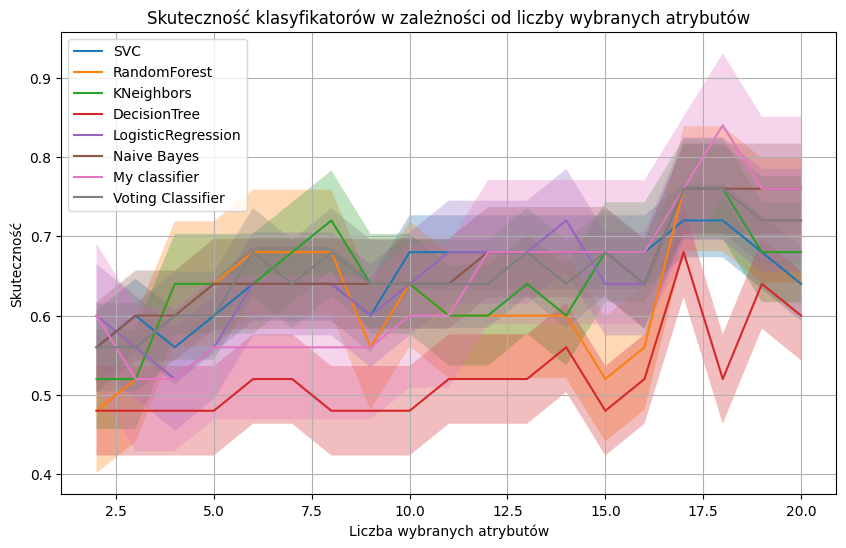

In [ ]:
num_features_list = list(range(2, 21))

classifiers = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'My classifier': CustomClassifier2()
}
voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items()], voting='hard')

classifiers['Voting Classifier'] = voting_clf

results = {clf: [] for clf in classifiers}

for k in num_features_list:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_selected, y_train)
        y_pred = clf.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        results[clf_name].append(accuracy)

means = {clf_name: np.mean(scores) for clf_name, scores in results.items()}
stds = {clf_name: np.std(scores) for clf_name, scores in results.items()}

plt.figure(figsize=(10, 6))

for clf_name, clf_results in results.items():
    plt.plot(num_features_list, clf_results, label=clf_name)

    plt.fill_between(num_features_list, np.array(clf_results) - stds[clf_name],
                     np.array(clf_results) + stds[clf_name], alpha=0.3)

plt.xlabel('Liczba wybranych atrybutów')
plt.ylabel('Skuteczność')
plt.title('Skuteczność klasyfikatorów w zależności od liczby wybranych atrybutów')
plt.legend()
plt.grid(True)
plt.show()

# 2-100 features plot for classifiers and voting classifier and t-paired test

Wyniki testu t-studenta:
SVC: p-value = 0.0, znaczenie: ISTOTNE
RandomForest: p-value = 0.0, znaczenie: ISTOTNE
KNeighbors: p-value = 0.0, znaczenie: ISTOTNE
DecisionTree: p-value = 0.0, znaczenie: ISTOTNE
LogisticRegression: p-value = 0.0, znaczenie: ISTOTNE
Naive Bayes: p-value = 0.0, znaczenie: ISTOTNE
My classifier: p-value = 0.0, znaczenie: ISTOTNE


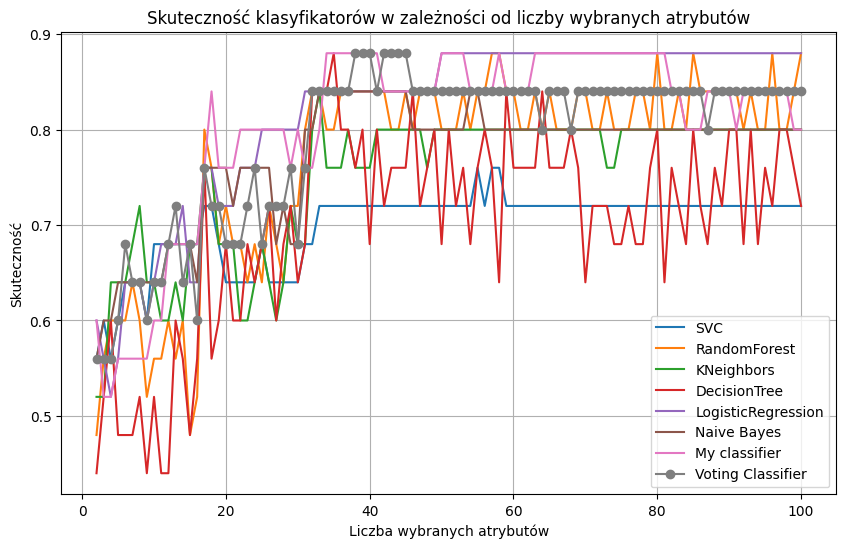

In [ ]:
num_features_list_100 = list(range(2, 101))

classifiers = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'My classifier': CustomClassifier2()
}
voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items()], voting='hard')

classifiers['Voting Classifier'] = voting_clf

results = {clf: [] for clf in classifiers}

for k in num_features_list_100:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_selected, y_train)
        y_pred = clf.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        results[clf_name].append(accuracy)

paired_ttest_results = {}
for clf_name, clf_results in results.items():
    if clf_name != 'Voting Classifier':
        t_statistic, p_value = ttest_rel(results['Voting Classifier'], clf_results)
        rounded_p_value = round(p_value, 2)
        if rounded_p_value < 0.05:
            significance = "ISTOTNE"
        else:
            significance = "NIEISTOTNE"
        paired_ttest_results[clf_name] = (rounded_p_value, significance)

print("Wyniki testu t-studenta:")
for clf_name, (p_value, significance) in paired_ttest_results.items():
    print(f"{clf_name}: p-value = {p_value}, znaczenie: {significance}")

plt.figure(figsize=(10, 6))

for clf_name, clf_results in results.items():
    if clf_name == 'Voting Classifier':
        plt.plot(num_features_list_100, clf_results, label=clf_name, marker='o')
    else:
        plt.plot(num_features_list_100, clf_results, label=clf_name)

plt.xlabel('Liczba wybranych atrybutów')
plt.ylabel('Skuteczność')
plt.title('Skuteczność klasyfikatorów w zależności od liczby wybranych atrybutów')
plt.legend()
plt.grid(True)
plt.show()

Wyniki testu t-paired:
Porównanie: SVC vs RandomForest -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: SVC vs KNeighbors -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: SVC vs DecisionTree -> p-value = 0.4, znaczenie: NIEISTOTNE
Porównanie: SVC vs LogisticRegression -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: SVC vs Naive Bayes -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: SVC vs My classifier -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: SVC vs Voting Classifier -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: RandomForest vs SVC -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: RandomForest vs KNeighbors -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: RandomForest vs DecisionTree -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: RandomForest vs LogisticRegression -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: RandomForest vs Naive Bayes -> p-value = 0.44, znaczenie: NIEISTOTNE
Porównanie: RandomForest vs My classifier -> p-value = 0.0, znaczenie: ISTOTNE
Porównanie: Ran

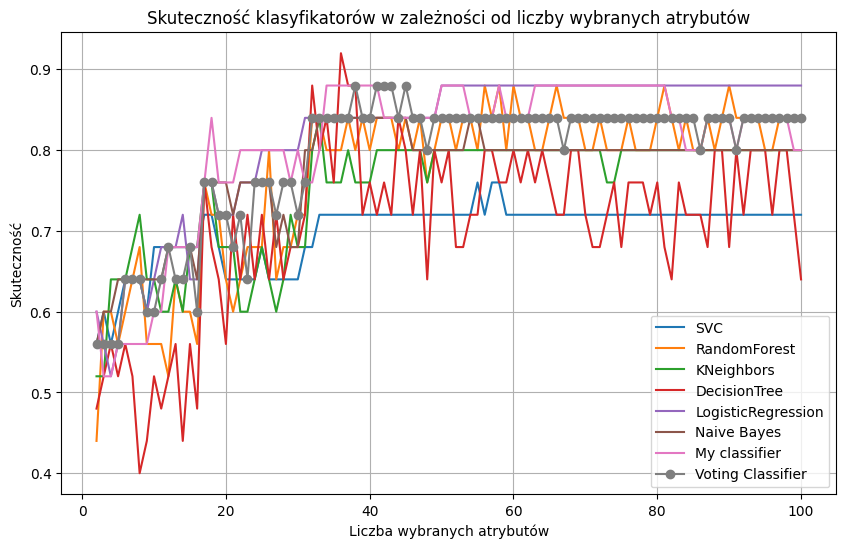

In [ ]:
num_features_list_100 = list(range(2, 101))

classifiers = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'My classifier': CustomClassifier2()
}

voting_clf = VotingClassifier(estimators=[(name, clf) for name, clf in classifiers.items()], voting='hard')
classifiers['Voting Classifier'] = voting_clf

results = {clf_name: [] for clf_name in classifiers}

for k in num_features_list_100:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    for clf_name, clf in classifiers.items():
        clf.fit(X_train_selected, y_train)
        y_pred = clf.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        results[clf_name].append(accuracy)

paired_ttest_results = {}
for clf_name1 in classifiers:
    for clf_name2 in classifiers:
        if clf_name1 != clf_name2:
            t_statistic, p_value = ttest_rel(results[clf_name1], results[clf_name2])
            rounded_p_value = round(p_value, 2)
            if rounded_p_value < 0.05:
                significance = "ISTOTNE"
            else:
                significance = "NIEISTOTNE"
            paired_ttest_results[(clf_name1, clf_name2)] = (rounded_p_value, significance)

print("Wyniki testu t-paired:")
for (clf_name1, clf_name2), (p_value, significance) in paired_ttest_results.items():
    print(f"Porównanie: {clf_name1} vs {clf_name2} -> p-value = {p_value}, znaczenie: {significance}")

plt.figure(figsize=(10, 6))
for clf_name, clf_results in results.items():
    if clf_name == 'Voting Classifier':
        plt.plot(num_features_list_100, clf_results, label=clf_name, marker='o')
    else:
        plt.plot(num_features_list_100, clf_results, label=clf_name)

plt.xlabel('Liczba wybranych atrybutów')
plt.ylabel('Skuteczność')
plt.title('Skuteczność klasyfikatorów w zależności od liczby wybranych atrybutów')
plt.legend()
plt.grid(True)
plt.show()

# Leave-one-out cv stats analysis with plot for 2-20 features

In [ ]:
classifiers_loo = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

loo = LeaveOneOut()

for clf_name, clf in classifiers_loo.items():
    predictions = []
    accuracies = []

    for train_index, test_index in loo.split(X):
        X_train, X_test = X.drop(test_index), X.loc[test_index].copy()
        y_train, y_test = y.drop(test_index), y.loc[test_index].copy()

        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        predictions.append(y_pred[0])

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    mean_accuracy = sum(accuracies) / len(accuracies)
    print(f"Dokładność metody Leave-One-Out dla {clf_name}: {mean_accuracy}")

Dokładność metody Leave-One-Out dla SVC: 0.7967479674796748
Dokładność metody Leave-One-Out dla RandomForest: 0.8943089430894309
Dokładność metody Leave-One-Out dla KNeighbors: 0.9024390243902439
Dokładność metody Leave-One-Out dla DecisionTree: 0.7967479674796748
Dokładność metody Leave-One-Out dla LogisticRegression: 0.9024390243902439
Dokładność metody Leave-One-Out dla Naive Bayes: 0.8292682926829268


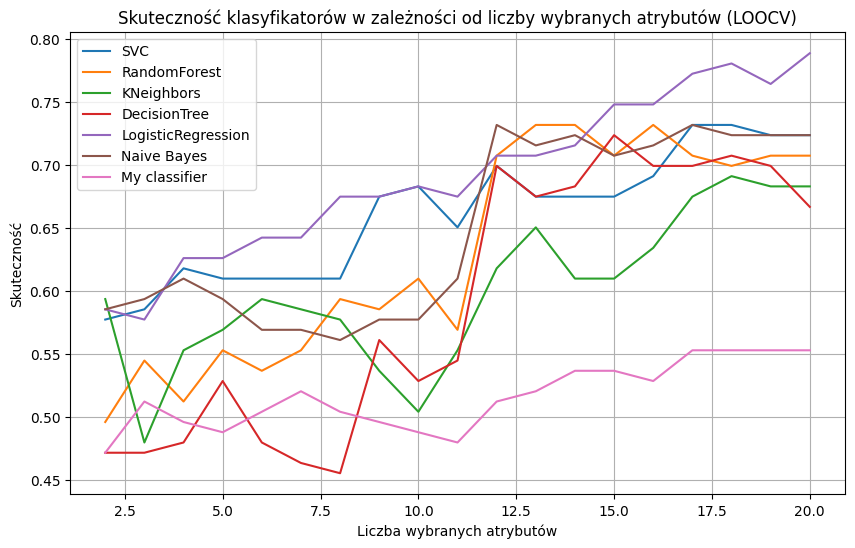

In [ ]:
classifiers_loo = {
    'SVC': SVC(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'Naive Bayes': GaussianNB(),
    'My classifier': CustomClassifier2()
}

num_features_list = list(range(2, 21))
results_loo = {clf_name: [] for clf_name in classifiers_loo}

loo = LeaveOneOut()

for clf_name, clf in classifiers_loo.items():
    accuracies = []

    for k in num_features_list:
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X, y)

        clf_accuracies = []
        for train_index, test_index in loo.split(X_selected):
            X_train, X_test = X_selected[train_index], X_selected[test_index]
            y_train, y_test = y[train_index], y[test_index]

            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            accuracy = accuracy_score(y_test, y_pred)
            clf_accuracies.append(accuracy)

        mean_accuracy = np.mean(clf_accuracies)
        accuracies.append(mean_accuracy)

    results_loo[clf_name] = accuracies

plt.figure(figsize=(10, 6))

for clf_name, clf_accuracies in results_loo.items():
    plt.plot(num_features_list, clf_accuracies, label=clf_name)

plt.xlabel('Liczba wybranych atrybutów')
plt.ylabel('Skuteczność')
plt.title('Skuteczność klasyfikatorów w zależności od liczby wybranych atrybutów (LOOCV)')
plt.legend()
plt.grid(True)
plt.show()

# Bootstrap statistical tests

In [ ]:
oob_scores = {clf_name: [] for clf_name in classifiers}
bootstrap_scores = {clf_name: [] for clf_name in classifiers}

for clf_name, clf in classifiers.items():
    for _ in range(10):
        X_sample, y_sample = resample(X_train, y_train_xgb, replace=True, n_samples=len(X_train))
        clf.fit(X_sample, y_sample)
        oob_pred = clf.predict(X_test)
        oob_accuracy = accuracy_score(y_test_xgb, oob_pred)
        oob_scores[clf_name].append(oob_accuracy)

print("Bootstrapowe próbkowanie out-of-bag (OOB) - średnia dokładność:")
for clf_name, scores in oob_scores.items():
    print(f"{clf_name}: {np.mean(scores)}")

for clf_name, clf in classifiers.items():
    for _ in range(10):
        X_sample, y_sample = resample(X_train, y_train_xgb, replace=True, n_samples=len(X_train))
        clf.fit(X_sample, y_sample)
        bootstrap_pred = clf.predict(X_test)
        bootstrap_accuracy = accuracy_score(y_test_xgb, bootstrap_pred)
        bootstrap_scores[clf_name].append(bootstrap_accuracy)

print("\nBootstrapowe metody oceny błędu - średnia dokładność:")
for clf_name, scores in bootstrap_scores.items():
    print(f"{clf_name}: {np.mean(scores)}")

mean_scores = {clf_name: [] for clf_name in classifiers}
for clf_name, _ in classifiers.items():
    for _ in range(10):
        X_sample, _ = resample(X_train, y_train_xgb, replace=True, n_samples=len(X_train))
        mean_value = np.mean(X_sample, axis=0)
        mean_scores[clf_name].append(mean_value)

print("\nBootstrapowe testy statystyczne - średnia wartość:")
for clf_name, scores in mean_scores.items():
    print(f"{clf_name}: {np.mean(scores)}")

Bootstrapowe próbkowanie out-of-bag (OOB) - średnia dokładność:
SVC: 0.5799999999999998
RandomForest: 0.792
KNeighbors: 0.784
DecisionTree: 0.6519999999999999
XGB: 0.768
AdaBoost: 0.6279999999999999
MLP: 0.2760000000000001
LogisticRegression: 0.8480000000000001
Naive Bayes: 0.6839999999999999

Bootstrapowe metody oceny błędu - średnia dokładność:
SVC: 0.5279999999999999
RandomForest: 0.772
KNeighbors: 0.74
DecisionTree: 0.6719999999999999
XGB: 0.776
AdaBoost: 0.5879999999999999
MLP: 0.25599999999999995
LogisticRegression: 0.8320000000000001
Naive Bayes: 0.6799999999999999

Bootstrapowe testy statystyczne - średnia wartość:
SVC: 3.4979072338725845
RandomForest: 3.4978189822851973
KNeighbors: 3.498404696021247
DecisionTree: 3.4986055954571977
XGB: 3.497841547152594
AdaBoost: 3.4976563629276285
MLP: 3.499095563970527
LogisticRegression: 3.4976501538605302
Naive Bayes: 3.497547177192913
